# 1. Import modules

In [2]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions


In [3]:
from sklearn.ensemble import IsolationForest

# 2. Read the training Data

In [5]:
file_path = r'/Users/dilli/Machine Learning Project/flight_sagemaker/data/train.csv'
train =pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,6152


In [6]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

## 2.1 Fixing data types

In [8]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
    for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [9]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,2024-05-15 08:55:00,2024-05-15 19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,2024-05-15 17:30:00,2024-05-15 04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,2024-05-15 11:40:00,2024-05-15 14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,2024-05-15 09:25:00,2024-05-15 18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,2024-05-15 22:55:00,2024-05-15 07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-15 10:45:00,2024-05-15 18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,2024-05-15 09:25:00,2024-05-15 18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,2024-05-15 14:00:00,2024-05-15 19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,2024-05-15 07:55:00,2024-05-15 13:25:00,330,1.0,No Info,6152


# 3. High level Summary of Data

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [12]:
train.describe(include='number')

,duration,total_stops,price
count,6695.000000,6694.000000,6695.000000
mean,633.489171,0.801464,9030.965646
std,503.006311,0.659737,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [13]:
train.describe(include='O')

,airline,source,destination,additional_info
count,6695,6695,6695,6695
unique,9,5,6,7
top,Jet Airways,Delhi,Cochin,No Info
freq,2391,2730,2730,5249


In [14]:
(
    train
    .assign(total_stops = train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6694.0,6695
unique,9,5,6,4.0,7
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2391,2730,2730,3580.0,5249


# 4. High level analysis of Missing values

In [16]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.014937


1 `row` has a `missing` value so we will drop it

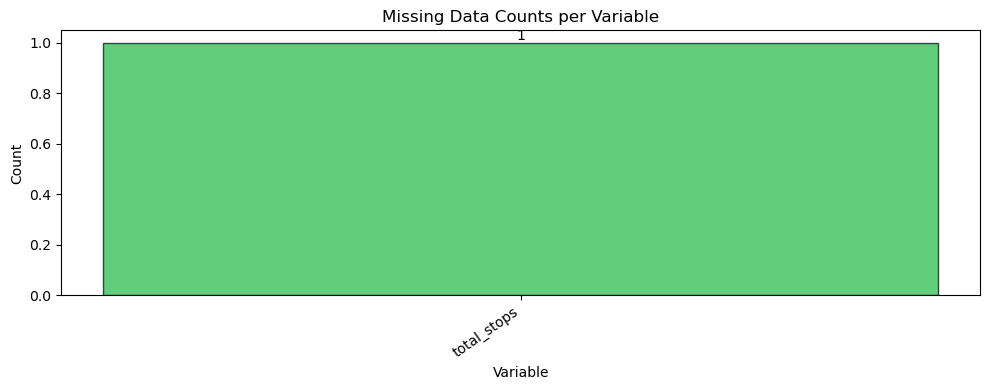

In [18]:
eda_helper_functions.plot_missing_info(train)

In [19]:
train.dropna(inplace=True)

In [20]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


# 5. High- Level analysis of Outliers

In [22]:
forest=IsolationForest(n_estimators=10,random_state=42)

In [23]:
(
    train
    .assign(outlier=forest.fit_predict(train[['duration','total_stops']]))
           ).query('outlier==-1')

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
5,Jet Airways,2019-04-21,Banglore,Delhi,2024-05-15 18:55:00,2024-05-15 22:00:00,185,0.0,In-flight meal not included,4544,-1
7,Spicejet,2019-06-15,Mumbai,Hyderabad,2024-05-15 05:45:00,2024-05-15 07:15:00,90,0.0,No check-in baggage included,2647,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2024-05-15 23:05:00,2024-05-15 04:25:00,1760,2.0,No Info,15129,-1
10,Jet Airways,2019-06-12,Kolkata,Banglore,2024-05-15 14:05:00,2024-05-15 10:05:00,1200,1.0,No Info,13044,-1
12,Jet Airways,2019-06-24,Delhi,Cochin,2024-05-15 21:25:00,2024-05-15 19:00:00,1295,2.0,No Info,13292,-1
...,...,...,...,...,...,...,...,...,...,...,...
6687,Air India,2019-06-06,Kolkata,Banglore,2024-05-15 05:50:00,2024-05-15 08:55:00,1625,2.0,No Info,12723,-1
6688,Jet Airways,2019-06-15,Delhi,Cochin,2024-05-15 21:25:00,2024-05-15 12:35:00,910,2.0,In-flight meal not included,9905,-1
6689,Indigo,2019-03-03,Mumbai,Hyderabad,2024-05-15 09:10:00,2024-05-15 10:40:00,90,0.0,No Info,5755,-1
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-15 10:45:00,2024-05-15 18:50:00,1925,2.0,No Info,11093,-1


In [24]:
(
    train
    .assign(outlier=forest.fit_predict(
        train
        .drop(columns="price")
        .select_dtypes(include="number")
    ))
 )


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-03-21,Banglore,New Delhi,2024-05-15 08:55:00,2024-05-15 19:10:00,615,1.0,In-flight meal not included,7832,1
1,Jet Airways,2019-03-27,Delhi,Cochin,2024-05-15 17:30:00,2024-05-15 04:25:00,655,1.0,In-flight meal not included,6540,1
2,Goair,2019-03-09,Banglore,New Delhi,2024-05-15 11:40:00,2024-05-15 14:35:00,175,0.0,No Info,7305,1
3,Air India,2019-06-12,Kolkata,Banglore,2024-05-15 09:25:00,2024-05-15 18:30:00,545,1.0,No Info,8366,1
4,Jet Airways,2019-03-12,Banglore,New Delhi,2024-05-15 22:55:00,2024-05-15 07:40:00,525,1.0,In-flight meal not included,11087,1
...,...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-15 10:45:00,2024-05-15 18:50:00,1925,2.0,No Info,11093,-1
6691,Air India,2019-05-01,Kolkata,Banglore,2024-05-15 09:25:00,2024-05-15 18:30:00,545,1.0,No Info,8891,1
6692,Jet Airways,2019-06-01,Delhi,Cochin,2024-05-15 14:00:00,2024-05-15 19:00:00,300,1.0,In-flight meal not included,10262,1
6693,Air Asia,2019-06-24,Delhi,Cochin,2024-05-15 07:55:00,2024-05-15 13:25:00,330,1.0,No Info,6152,1


# 6. Pairplot

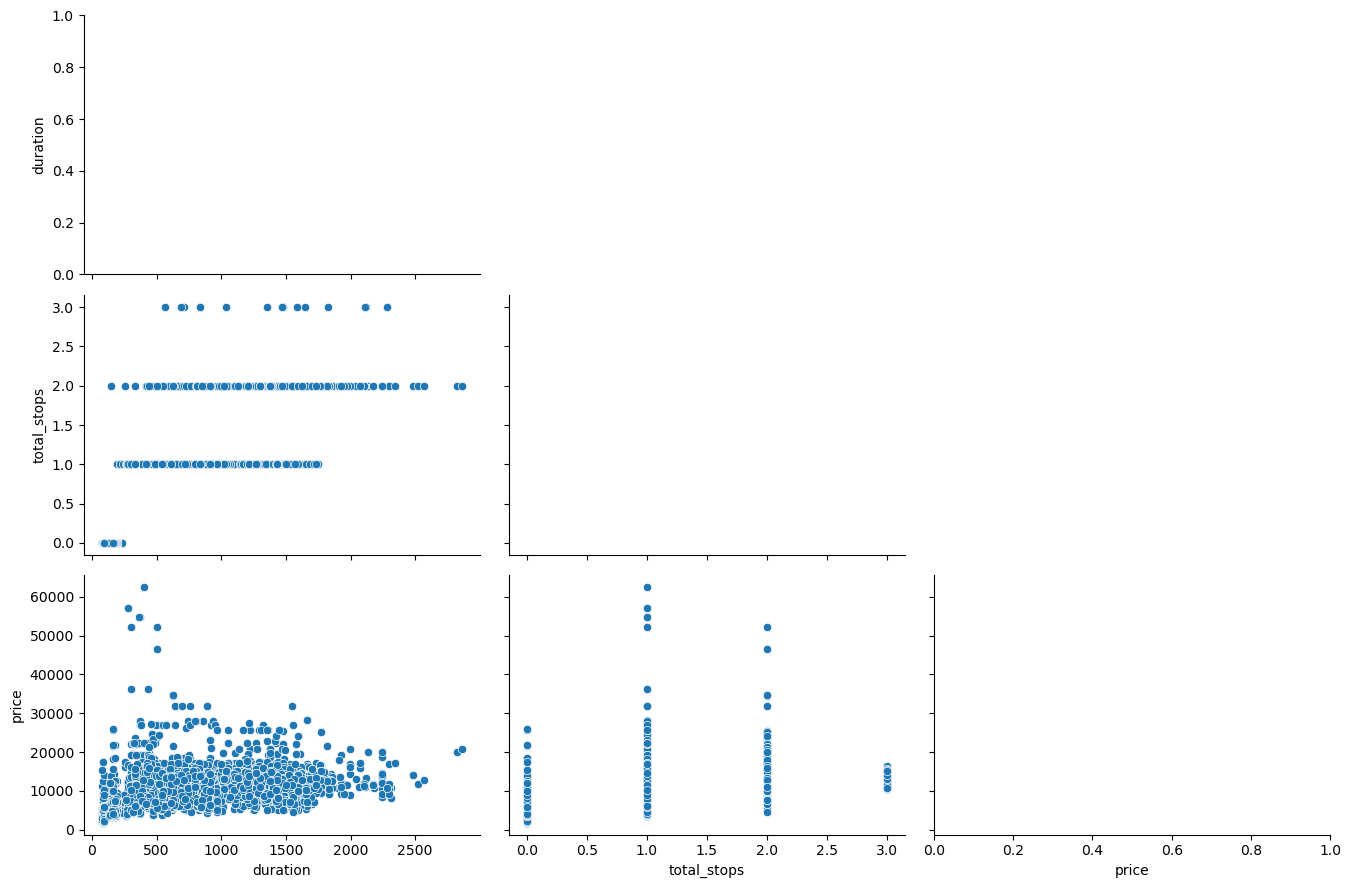

In [26]:
eda_helper_functions.pair_plots(train)

# 7. Correlation matrix

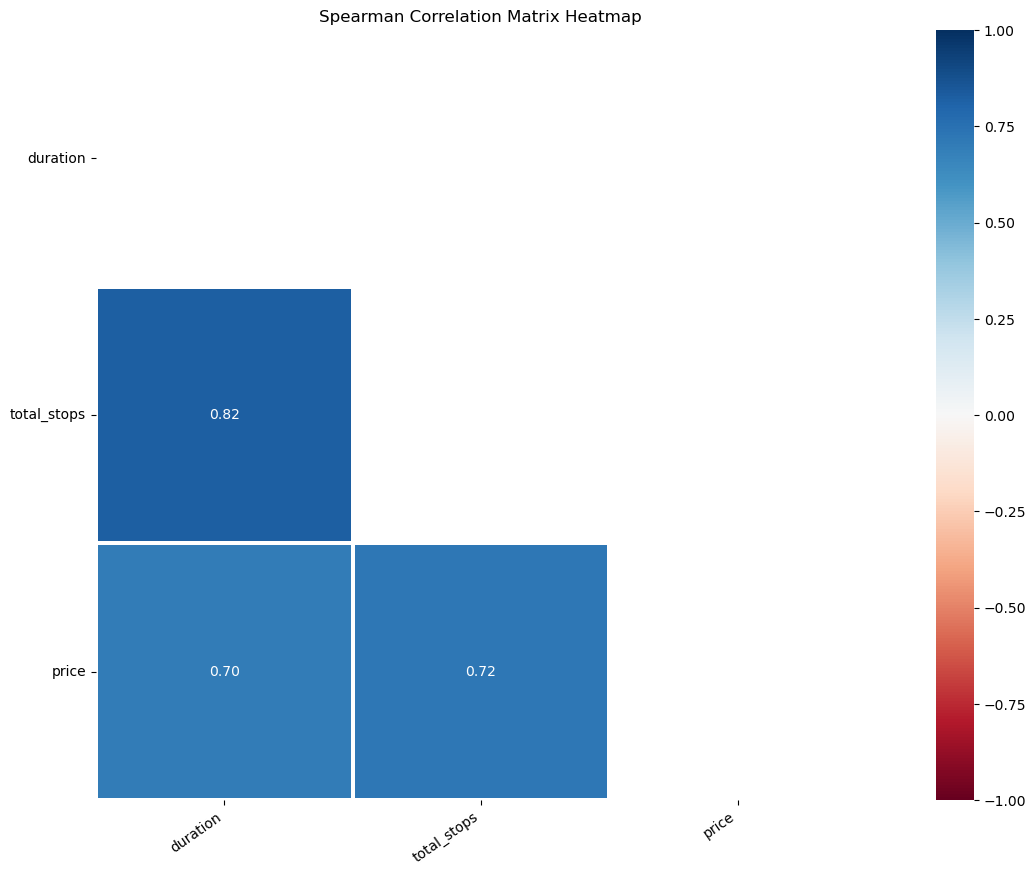

In [28]:
eda_helper_functions.correlation_heatmap(train,figsize=(18,10))

In [29]:
train.corr(numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.731218,0.509188
total_stops,0.731218,1.000000,0.606701
price,0.509188,0.606701,1.000000


<Axes: >

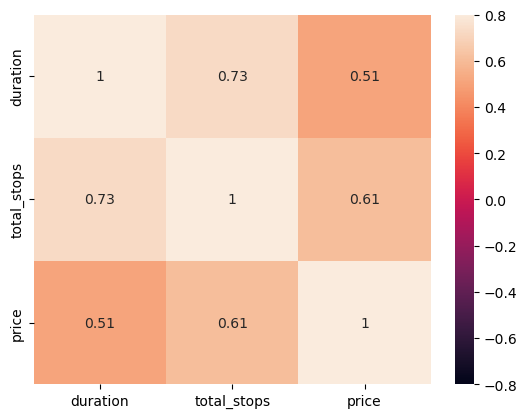

In [30]:
sns.heatmap(train.corr(numeric_only=True), annot=True, vmin=-0.8, vmax=0.8)  # Adjust range for better contrast

<Axes: >

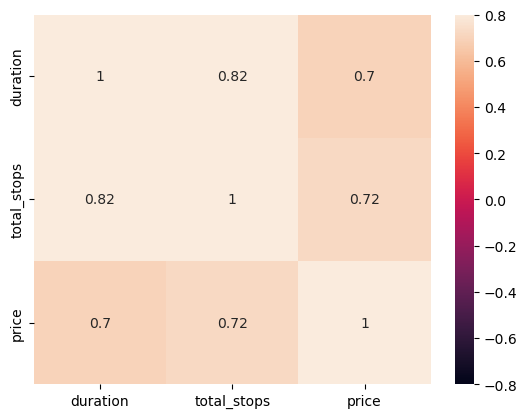

In [31]:
sns.heatmap(train.corr(numeric_only=True, method ='spearman'), annot=True, vmin=-0.8, vmax=0.8)  # Adjust range for better contrast

<Axes: >

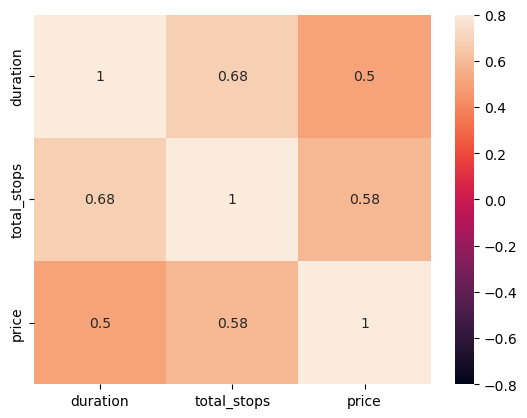

In [32]:
sns.heatmap(train.corr(numeric_only=True, method ='kendall'), annot=True, vmin=-0.8, vmax=0.8)  # Adjust range for better contrast

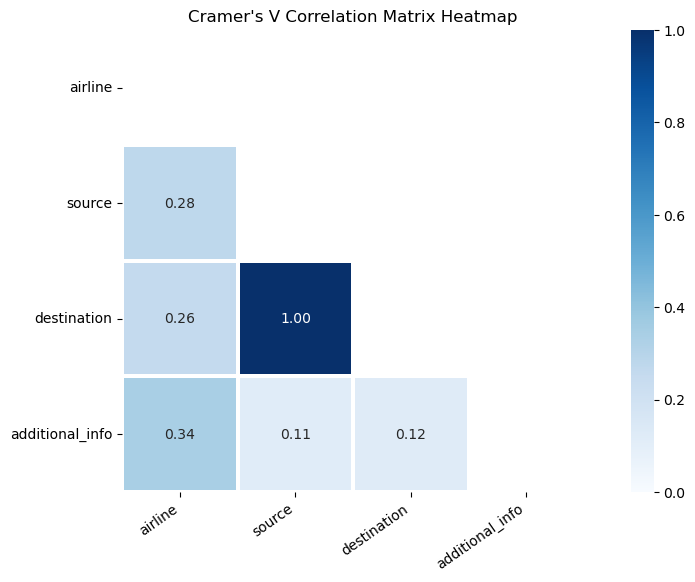

In [33]:
eda_helper_functions.cramersV_heatmap(train)

# 8. Deatiled Analysis


In [35]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 8.1 `airline`

In [37]:
eda_helper_functions.cat_summary(train, 'airline')

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,9
top,Jet Airways
freq,2391


,count,percentage
category,,
Jet Airways,2391,0.357186
Indigo,1296,0.193606
Air India,1075,0.160592
Multiple Carriers,736,0.109949
Spicejet,537,0.080221
Vistara,322,0.048103
Air Asia,211,0.031521
Goair,125,0.018673
Trujet,1,0.000149


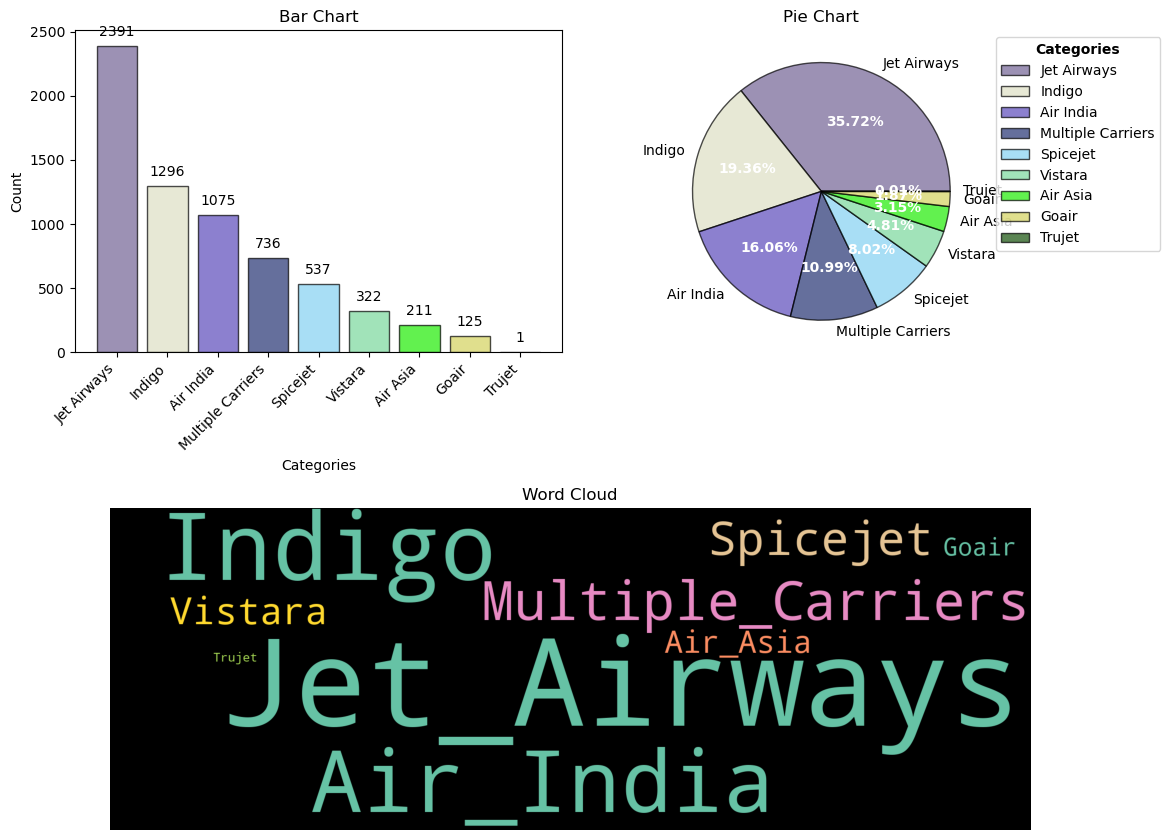

In [38]:
eda_helper_functions.cat_univar_plots(train,'airline')

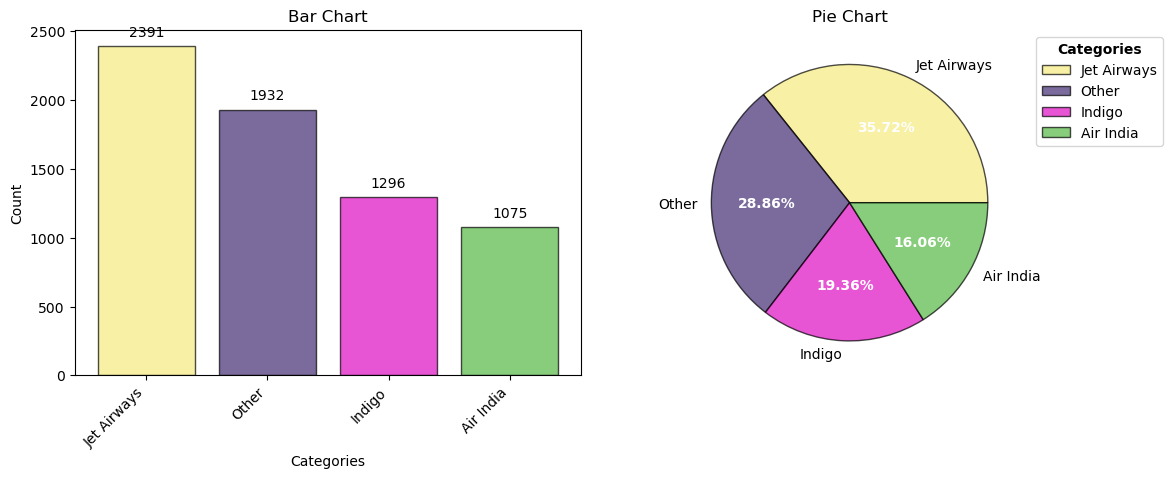

In [39]:
eda_helper_functions.cat_univar_plots(train,'airline',k=3,show_wordcloud=False)

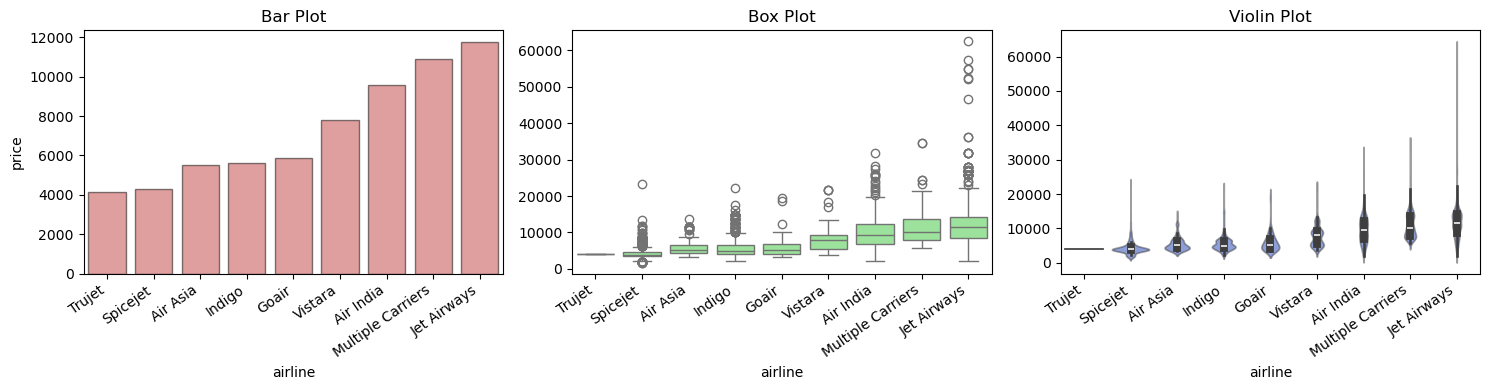

In [40]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

In [41]:
eda_helper_functions.num_cat_hyp_testing(train,'price','airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 473.2504388077414
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3130.947388921903
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


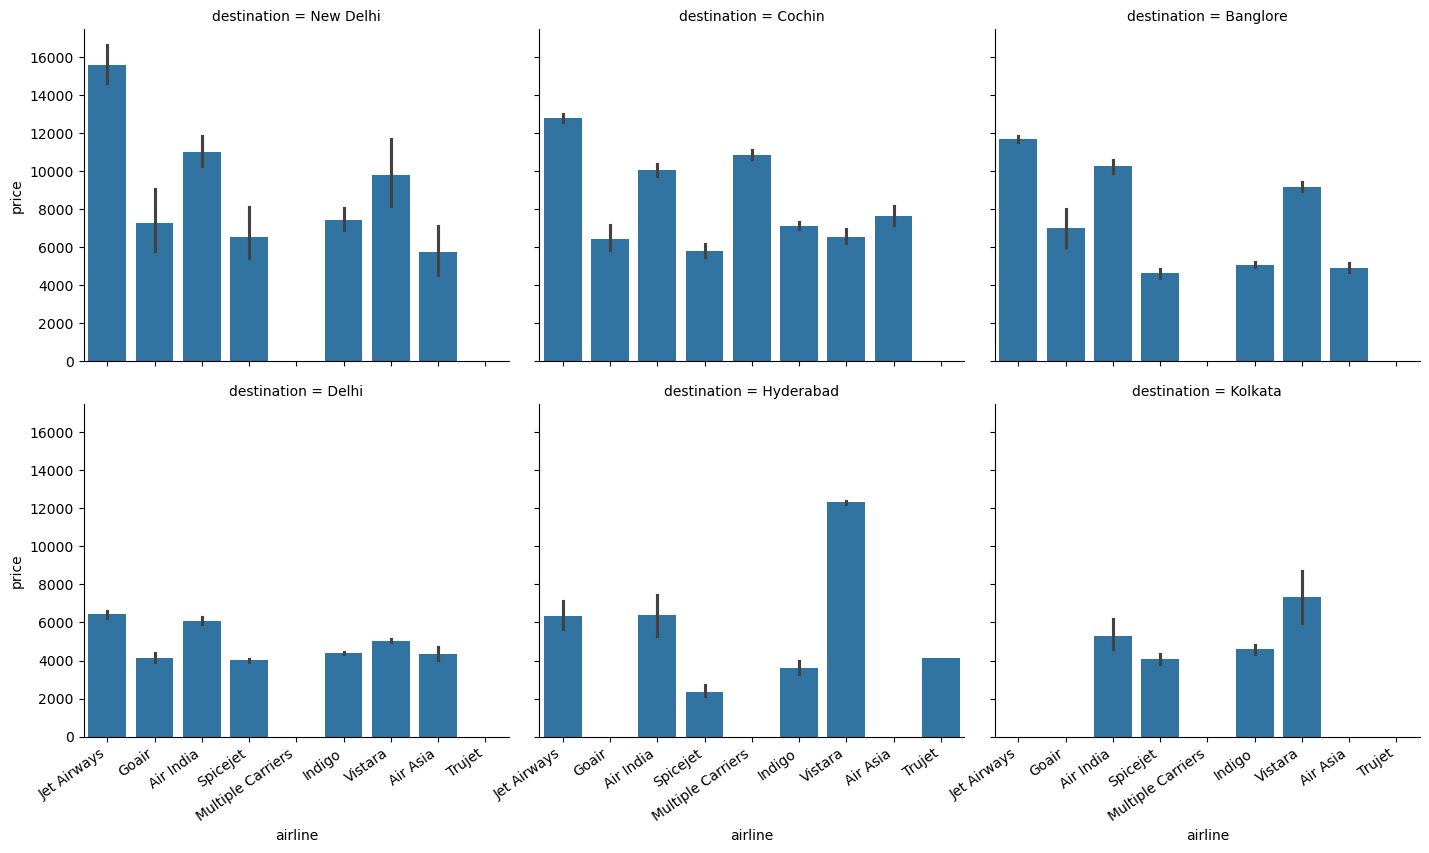

In [42]:
airline_grid=sns.FacetGrid(
    data=train,
    col = 'destination',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot,'airline','price',order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

## 8.2 `date_of_journey`

In [44]:
train.date_of_journey

0      2019-03-21
1      2019-03-27
2      2019-03-09
3      2019-06-12
4      2019-03-12
          ...    
6690   2019-03-21
6691   2019-05-01
6692   2019-06-01
6693   2019-06-24
6694   2019-03-01
Name: date_of_journey, Length: 6694, dtype: datetime64[ns]

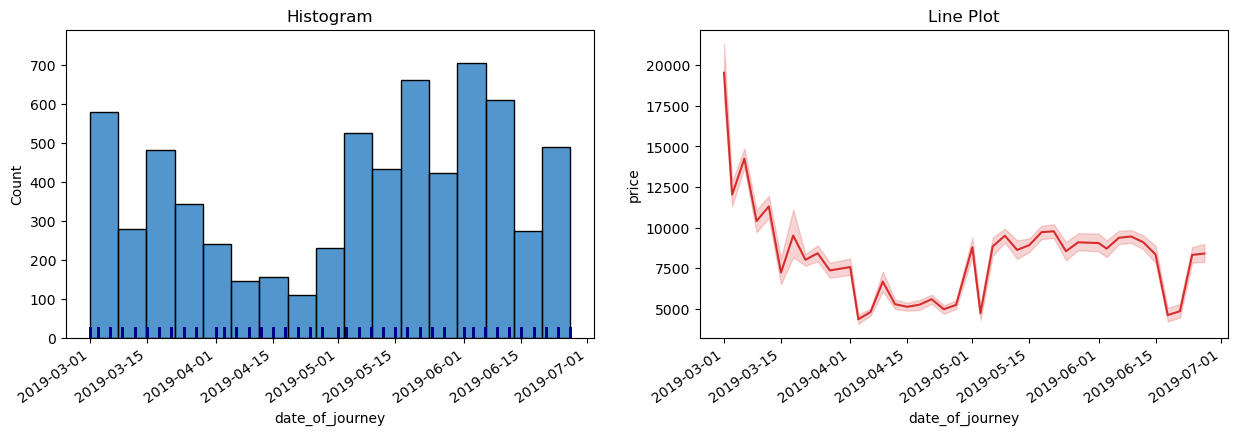

In [45]:
eda_helper_functions.dt_univar_plots(train,var='date_of_journey',target='price')

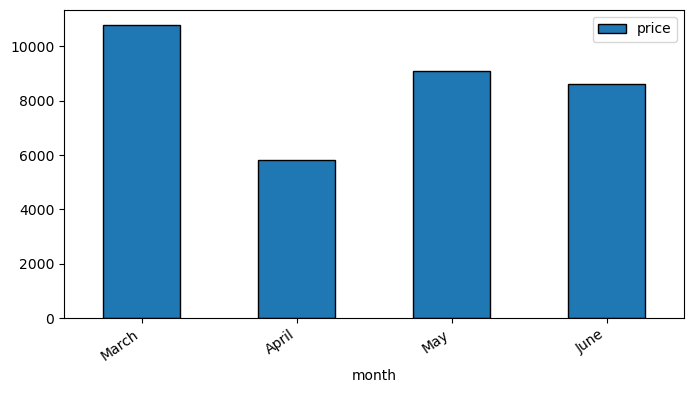

In [46]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey',freq='M'))
    .price.mean()
    .to_frame()
    .set_axis(['March','April','May','June'],axis=0)
    .rename_axis(index='month')
    .plot(
        kind='bar',
        figsize=(8,4),
        edgecolor='black'
    
    
    
    )


)

eda_helper_functions.rotate_xlabels(plt.gca())

<Axes: xlabel='week'>

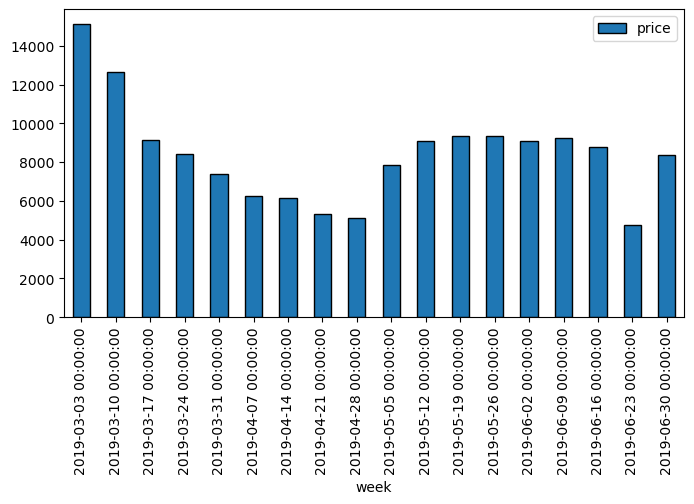

In [47]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey',freq='W'))
    .price.mean()
    .to_frame()
    .rename_axis(index='week')
    .plot(
        kind='bar',
        figsize=(8,4),
        edgecolor='black'
    
    
    
    )


)


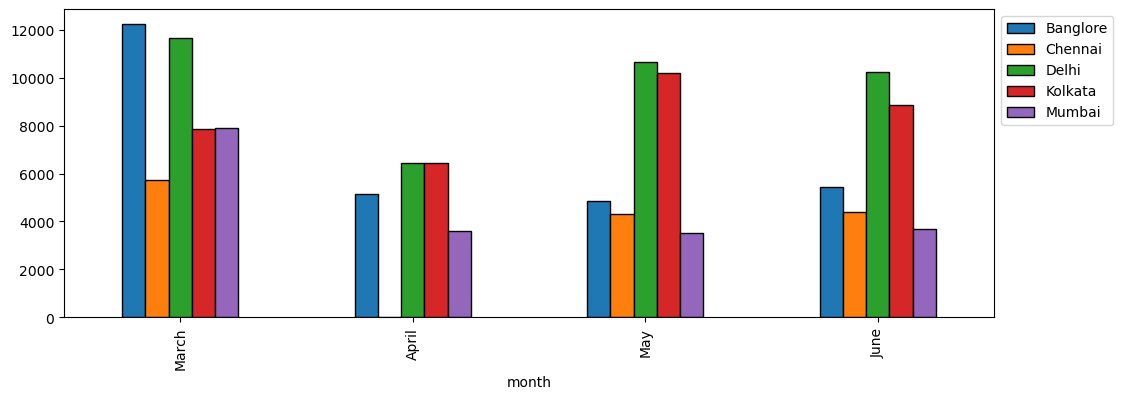

In [48]:
(
    train
    .groupby([pd.Grouper(key='date_of_journey',freq='M'),'source'])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(['March','April','May','June'])
    .rename_axis(index='month')
    .plot(kind='bar',figsize=(12,4),edgecolor='black')

)

ax=plt.gca()
ax.legend(loc='upper left',
         bbox_to_anchor=(1,1))

### 8.3 `dep_time`

In [50]:
train.dep_time

0      2024-05-15 08:55:00
1      2024-05-15 17:30:00
2      2024-05-15 11:40:00
3      2024-05-15 09:25:00
4      2024-05-15 22:55:00
               ...        
6690   2024-05-15 10:45:00
6691   2024-05-15 09:25:00
6692   2024-05-15 14:00:00
6693   2024-05-15 07:55:00
6694   2024-05-15 11:50:00
Name: dep_time, Length: 6694, dtype: datetime64[ns]

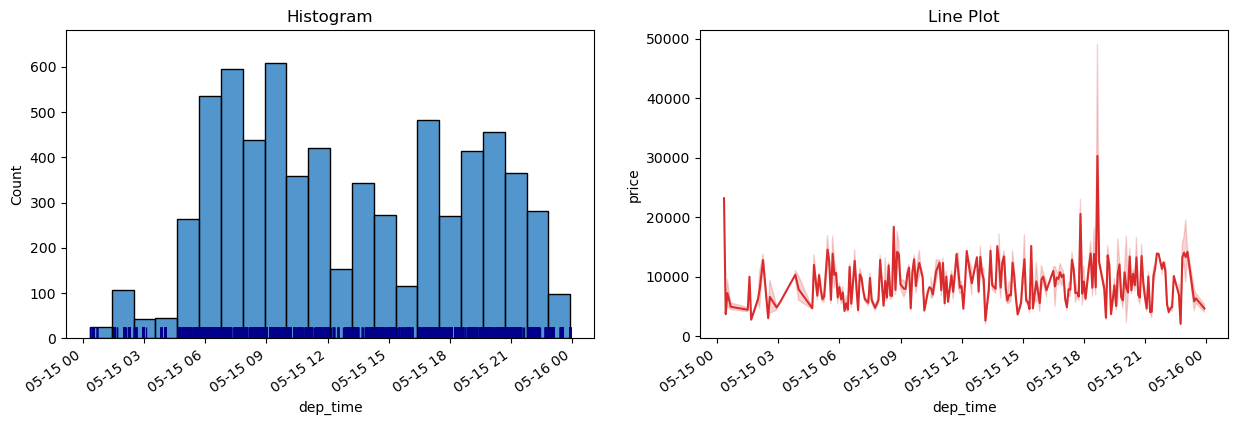

In [51]:
eda_helper_functions.dt_univar_plots(train,'dep_time','price')

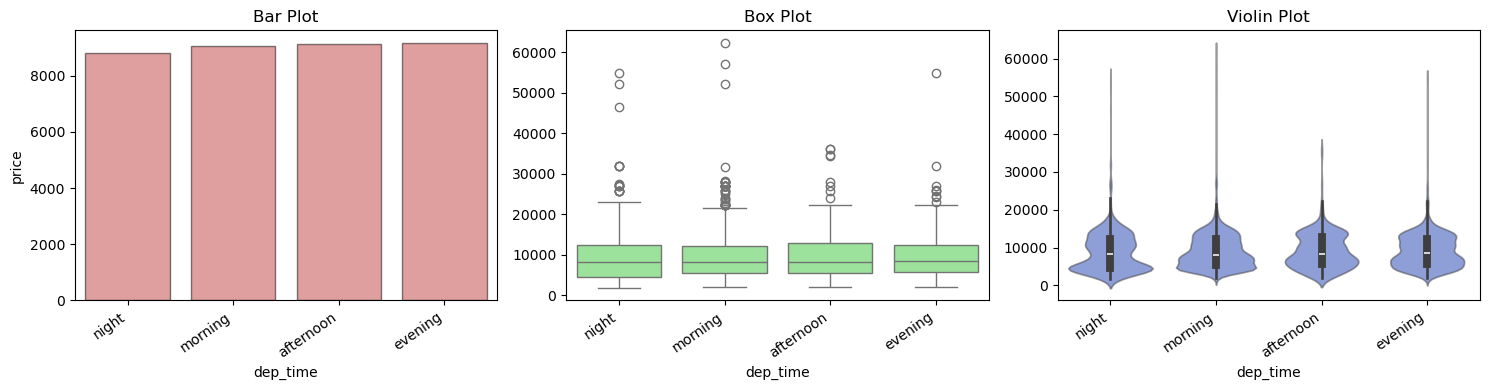

In [52]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

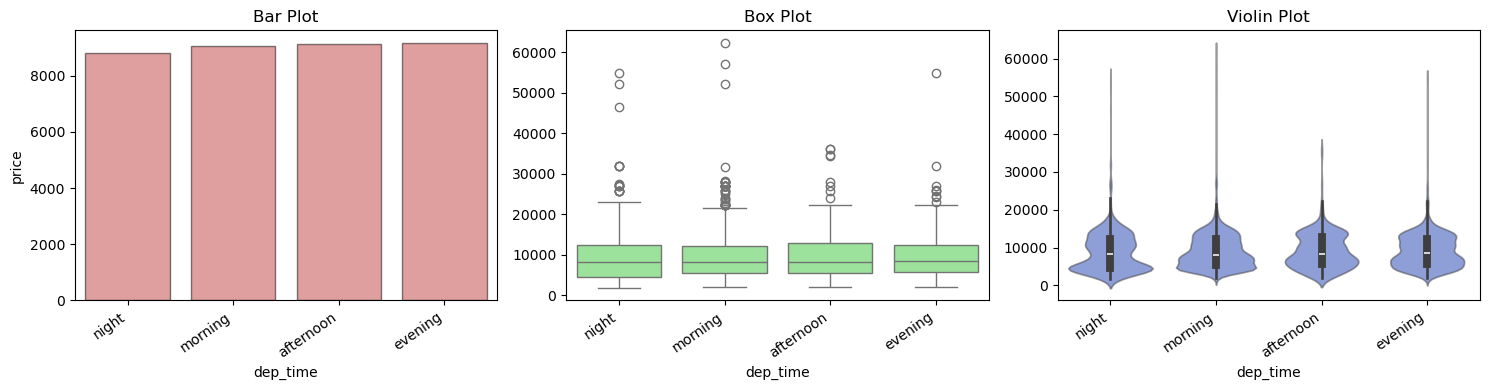

In [53]:
(
    train
    .assign(dep_time=lambda df_: (
    np.select([df_.dep_time.dt.hour.between(4,12,inclusive='left'),
              df_.dep_time.dt.hour.between(12,16,inclusive='left'),
              df_.dep_time.dt.hour.between(16,20,inclusive='left')],
             ['morning','afternoon','evening'],
             default='night')))
    .pipe(eda_helper_functions.num_cat_bivar_plots,'price','dep_time')


)

In [54]:
(
    train
    .assign(dep_time=lambda df_: (
    np.select([df_.dep_time.dt.hour.between(4,12,inclusive='left'),
              df_.dep_time.dt.hour.between(12,16,inclusive='left'),
              df_.dep_time.dt.hour.between(16,20,inclusive='left')],
             ['morning','afternoon','evening'],
             default='night')))
    .pipe(eda_helper_functions.num_cat_hyp_testing,'price','dep_time')
)

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 1.413550690509229
- p-value              : 0.23672445301104308
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and dep_time are not associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 15.36774247231832
- p-value              : 0.0015278884707987108
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and dep_time are associated to each other


Since the Anova suggestprice and dep_time are not associated, we will consider this in our model building

## 8.4 `duration`

In [57]:
train.duration

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6694, dtype: int64

In [58]:
eda_helper_functions.num_summary(train,'duration')

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6694, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,510.00
75,920.00
90,1440.00
95,1601.75
99,1855.00


,value
mean,633.371676
trimmed mean (5%),599.575174
trimmed mean (10%),570.895258
median,510.000000


,value
var,252960.712875
std,502.951999
IQR,750.000000
mad,340.000000
coef_variance,0.794087


,value
skewness,0.894131
kurtosis,-0.052204


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8865419626235962
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.45769626661695
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [59]:
eda_helper_functions.num_num_hyp_testing(train,'duration','price')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5091878071906605
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6980000420004596
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


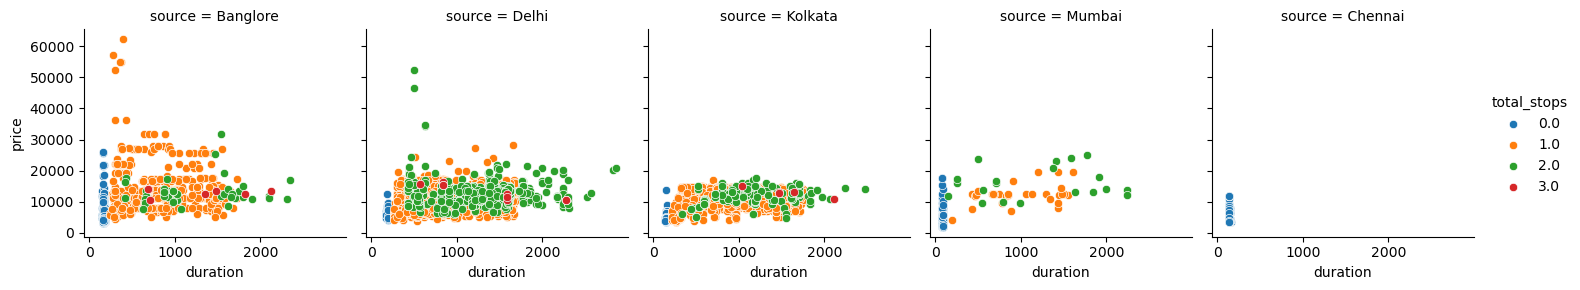

In [60]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [61]:
eda_helper_functions.get_iqr_outliers(train,'duration')

Lower Limit : -955.0
Upper Limit : 2045.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
3690,Air India,2019-05-01,Kolkata,Banglore,2024-05-15 05:50:00,2024-05-15 16:15:00,2065,2.0,No Info,10991
6079,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-15 17:55:00,2024-05-15 04:25:00,2070,2.0,No Info,17072
3225,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-15 17:55:00,2024-05-15 04:25:00,2070,2.0,In-flight meal not included,15812
2990,Air India,2019-03-03,Banglore,New Delhi,2024-05-15 11:05:00,2024-05-15 22:10:00,2105,2.0,No Info,11791
4589,Air India,2019-03-18,Banglore,New Delhi,2024-05-15 11:05:00,2024-05-15 22:10:00,2105,2.0,No Info,11161
1517,Air India,2019-03-03,Banglore,New Delhi,2024-05-15 11:05:00,2024-05-15 22:10:00,2105,2.0,No Info,11948
2916,Air India,2019-05-12,Kolkata,Banglore,2024-05-15 12:00:00,2024-05-15 23:15:00,2115,3.0,No Info,10991
2170,Air India,2019-03-12,Banglore,New Delhi,2024-05-15 06:45:00,2024-05-15 18:05:00,2120,3.0,No Info,13387
1105,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-15 16:50:00,2024-05-15 04:25:00,2135,2.0,No Info,19907
4000,Air India,2019-03-06,Delhi,Cochin,2024-05-15 07:05:00,2024-05-15 19:15:00,2170,2.0,No Info,11552


## 8.5 `additional_info`

In [63]:
eda_helper_functions.cat_summary(train,'additional_info')

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,7
top,No Info
freq,5248


,count,percentage
category,,
No Info,5248,0.783986
In-flight meal not included,1215,0.181506
No check-in baggage included,207,0.030923
1 Long layover,16,0.002390
Change airports,5,0.000747
Business class,2,0.000299
Red-eye flight,1,0.000149


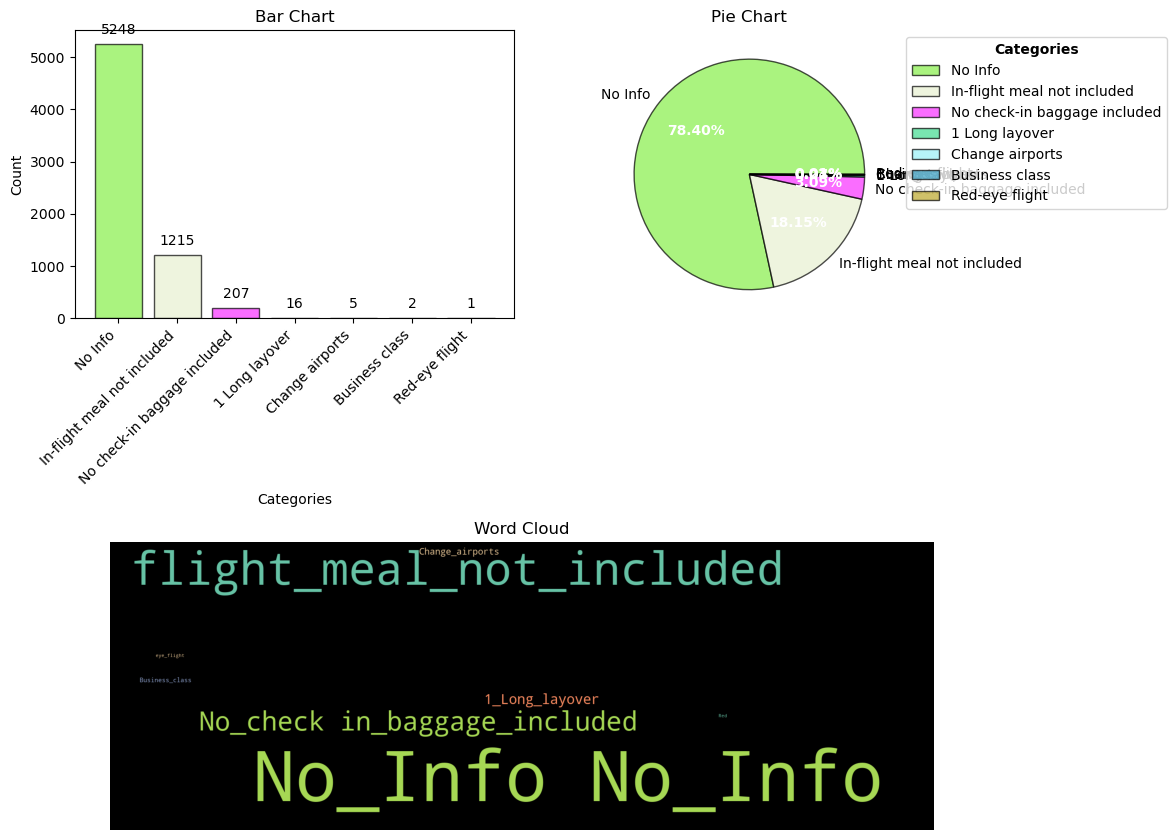

In [64]:
eda_helper_functions.cat_univar_plots(train,'additional_info')

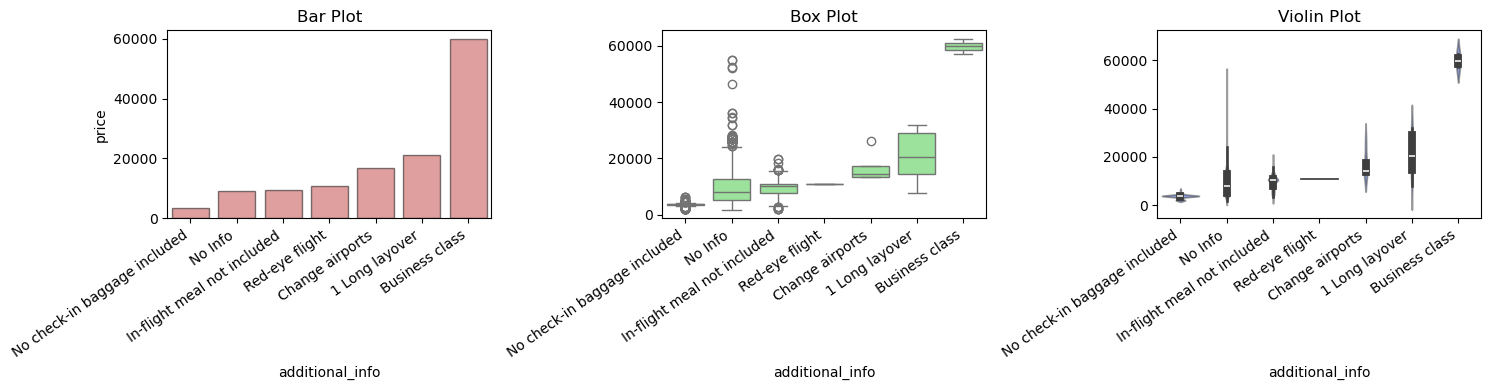

In [65]:
eda_helper_functions.num_cat_bivar_plots(train,'price','additional_info')

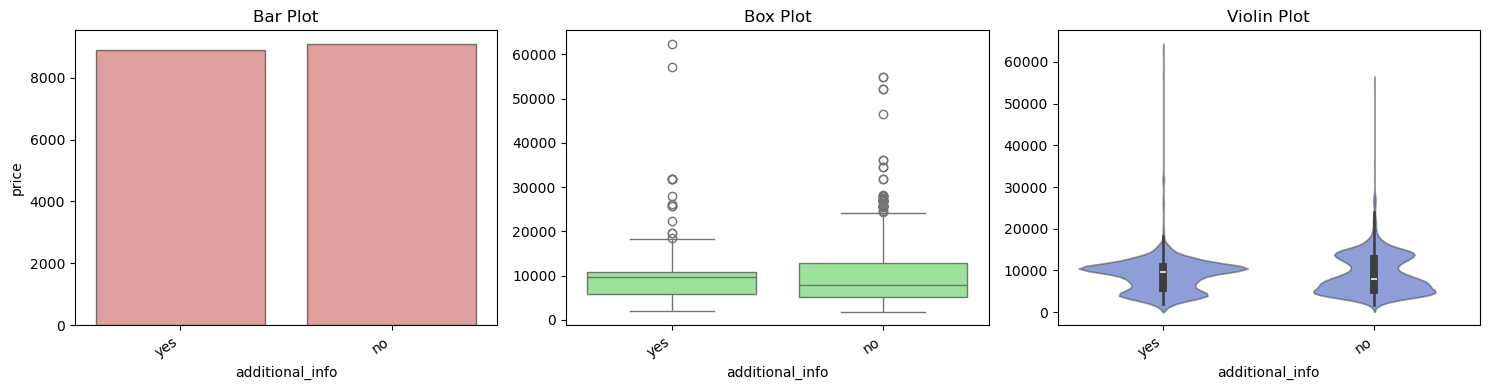

In [66]:
# convertion additional_info into a binary feature for analysis

(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info"))

In [67]:
eda_helper_functions.num_cat_hyp_testing(train,'price','additional_info')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 121.29226780051071
- p-value              : 5.326678075216221e-146
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and additional_info are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 541.8032806818912
- p-value              : 8.254903397053232e-114
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and additional_info are associated to each other


# 9. Automated EDA using `ProfileReport` from `ydata_profiling`

In [69]:
from ydata_profiling import ProfileReport

In [70]:
report = ProfileReport(train)

In [138]:
report.to_file(output_file='output.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]